In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize = 16)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

In [4]:
train = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\train.csv',encoding = 'cp949')
test = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\test.csv',encoding = 'cp949')

In [5]:
test = test.rename(columns={'ANONYMOUS_1' : '수치형데이터1','ANONYMOUS_2' : '수치형데이터2','COMPONENT_ARBITRARY':'샘플오일관련부품','AG':'은','CO':'일산화탄소','CR':'크로뮴','CU':'구리','FE':'철','H2O':'물','MN':'망가니즈','MO':'몰리브데넘','NI':'니켈','TI':'타이타늄','V':'바나듐','ZN':'아연','PQINDEX':'입자 정량 지수','V40':'점도 40도','YEAR':'진단년도'})
train = train.rename(columns={'ANONYMOUS_1' : '수치형데이터1','ANONYMOUS_2' : '수치형데이터2','COMPONENT_ARBITRARY':'샘플오일관련부품','AG':'은','CO':'일산화탄소','CR':'크로뮴','CU':'구리','FE':'철','H2O':'물','MN':'망가니즈','MO':'몰리브데넘','NI':'니켈','TI':'타이타늄','V':'바나듐','ZN':'아연','PQINDEX':'입자 정량 지수','V40':'점도 40도','YEAR':'진단년도'})

## 결측치가 많은 컬럼 제거

In [6]:
drop_columns=['FH2O','FNOX','FOPTIMETHGLY','FOXID','FSO4','FTBN','FUEL','SOOTPERCENTAGE','U100','U75','U50','U25','U20','U14','U6','U4','V100']

In [7]:
train = train.drop(columns=drop_columns)

In [8]:
test_columns_list = test.columns

In [9]:
train['Y_LABEL']

0        0
1        0
2        1
3        0
4        0
        ..
14090    0
14091    0
14092    0
14093    0
14094    0
Name: Y_LABEL, Length: 14095, dtype: int64

In [10]:
train[test_columns_list]

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652


In [11]:
train_test_col = train[test_columns_list]

In [12]:
train_test_col

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652


In [13]:
test

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [14]:
df = pd.concat([train_test_col,test])
df

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


# 피처 엔지니어링

In [15]:
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

In [16]:
num_attribss_list = df.drop(columns = ['ID','샘플오일관련부품']).columns

In [17]:
num_attribss_list_drop_mang = df.drop(columns = ['ID','샘플오일관련부품','타이타늄']).columns

In [18]:
num_attribss = df[num_attribss_list]
cat_attribs = df[['샘플오일관련부품']]
y = train['Y_LABEL']

num_attribss_mang = df[num_attribss_list_drop_mang]
# 변수별 타입 나누기

In [19]:
df

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


## 이상치 제거

In [20]:
q3 = df.quantile(0.75)  # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = df.quantile(0.25)

iqr = q3 - q1

iqr

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13436\764714985.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)  # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
C:\Users\yoon9\AppData\Local\Temp\ipykernel_13436\764714985.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)


수치형데이터1     2149.25
진단년도           7.00
수치형데이터2      212.00
은              0.00
일산화탄소          0.00
크로뮴            3.00
구리            16.00
철            127.00
물              0.00
망가니즈           2.00
몰리브데넘          7.00
니켈             0.00
입자 정량 지수     166.00
타이타늄           0.00
바나듐            0.00
점도 40도        65.30
아연          1080.00
dtype: float64

In [21]:
train_out = train[test_columns_list]
train_out['Y_LABEL'] = train['Y_LABEL']
train_out

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13436\1438212298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_out['Y_LABEL'] = train['Y_LABEL']


,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


In [22]:
# '국어' 열에 대하여 이상치 여부를 판별해주는 함수

def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

In [23]:
train_outlier = remove_out(train_out,num_attribss_list)

In [24]:
train_outlier

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,Y_LABEL
0,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
1,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
2,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
3,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
4,TRAIN_00006,COMPONENT3,1416,2015,616,0,0,0,3,35,0.0,0,0,0,26,0,0,148.5,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6111,TRAIN_14085,COMPONENT2,4976,2013,200,0,0,0,14,3,0.0,0,0,0,7,0,0,44.0,651,0
6112,TRAIN_14087,COMPONENT1,1192,2014,200,0,0,0,0,9,0.0,0,0,0,11,0,0,106.2,1204,0
6113,TRAIN_14088,COMPONENT3,1311,2010,511,0,0,0,8,43,0.0,0,0,0,16,0,0,128.9,20,0
6114,TRAIN_14089,COMPONENT2,1552,2007,375,0,0,0,41,15,0.0,0,0,0,35,0,0,59.8,395,1


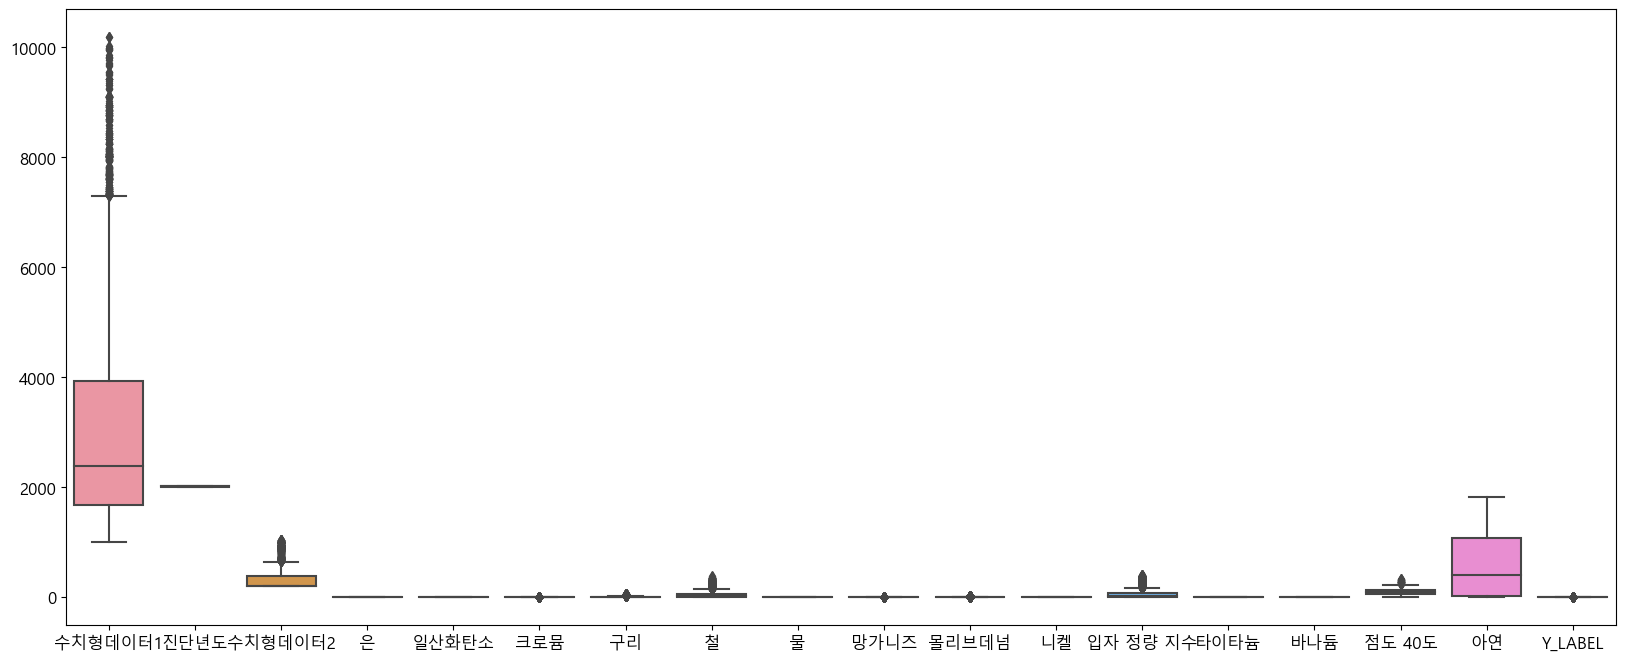

In [143]:
plt.figure(figsize=(20,8))
sns.boxplot(train_outlier)
plt.show()

In [25]:
df_out = pd.concat([train_outlier,test])

## 스케일링

### StandardScaler

In [26]:
# 스탠다드 스케일러
def standard_scale(df):
    # 수치형 변수 스케일링
    sta_scaler = StandardScaler()
    sta_X_scale = sta_scaler.fit_transform(df)
    sta_X_scale = pd.DataFrame(sta_X_scale, columns=df.columns)
    return sta_X_scale  # 스케일링 데이터 프레임화

# MinMax scaler
def MM_scale(df):
    MM_scaler = MinMaxScaler()
    MM_X_scale = MM_scaler.fit_transform(df)
    MM_X_scale = pd.DataFrame(MM_X_scale, columns=df.columns)
    return MM_X_scale  # 스케일링 데이터 프레임화

# robust scaler
def robust_scale(df):
    robustScaler = RobustScaler()
    print(robustScaler.fit(df))
    train_data_robustScaled = robustScaler.transform(df)
    robust_X_scale = pd.DataFrame(train_data_robustScaled, columns=num_attribss.columns)
    return robust_X_scale

# 인코딩

In [27]:
# 원핫인코딩 함수 적용
def hot1_encoding(df):
    hot1_encoder = OneHotEncoder(sparse=False,drop='if_binary')
    X_1hot = hot1_encoder.fit_transform(df)
    X_1hot = pd.DataFrame(X_1hot, columns=hot1_encoder.get_feature_names())
    return X_1hot

# 라벨 인코딩
def label_encoding(df):
    X_label = df.copy()
    lab_encoder = LabelEncoder()  #순서가 있는 카테고리형
    for name in df.columns:
        X_label[name] = lab_encoder.fit_transform(df[name])
    X_label_ob = X_label.astype('object')
    return X_label_ob

# 데이터 프레임 합치기

In [28]:
def cocnat_df(df1,df2):
    df1 = df1.reset_index()
    df2 = df2.reset_index()
    df_all = pd.concat([df1,df2],axis=1)
    df_all = df_all.drop(columns=['index'])
    return df_all

In [29]:
df_base = cocnat_df(num_attribss,label_encoding(cat_attribs))

In [30]:
df_base

,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
0,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,2
1,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,1
2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,2
4,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163,2
20132,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13,2
20133,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13,2
20134,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478,1


# 데이터 나누기

In [31]:
def split_train_test(df):

    train = df[:14095]
    test = df[14095:]
    return train, test

def split_train_test_out(df):

    train = df[:6116]
    test = df[6116:]
    return train, test

def split_train_val(df,y):

    X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)
    print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

    return X_train, X_val, y_train, y_val


## 모델 평가 함수

In [32]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
def model_eval(pred, answer):
    print(f'accuracy_score : {accuracy_score(pred,answer)}')
    print(f'recall_score : {recall_score(pred,answer)}')
    print(f'precision_score : {precision_score(pred,answer)}')
    print(f'f1_score : {f1_score(pred,answer)}')
    print(f'coufusion_matrix : ')
    print(confusion_matrix(pred,answer))

## 모델 학습 및 평가 함수

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
def pipeline_RF(X_train,X_val,y_train,y_val):
    model_rf = RandomForestClassifier(max_depth=10,n_estimators=100)
    model_rf.fit(X_train,y_train)
    print(model_rf)
    X_val_predicted = model_rf.predict(X_val)

    print(model_eval(X_val_predicted,y_val))

    return model_rf

# 예측 함수

In [36]:
def make_submission(model,test,submission):
    name = input(str)
    pred_test = model.predict(test)
    submission['Y_LABEL'] = pred_test
    print(submission)
    submission.to_csv(rf'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\submission_{name}.csv',index = False)
    print('Done')


## X_base Baseline 모델 (피쳐엔지니어링 X + Label Encoding)

In [37]:
train_base, test_base = split_train_test(df_base)

In [38]:
test_base

,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
14095,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091,0
14096,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12,2
14097,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714,1
14098,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94,2
14099,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163,2
20132,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13,2
20133,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13,2
20134,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478,1


In [39]:
X_train_base, X_val_base, y_train_base, y_val_base = split_train_val(train_base,y)

(9866, 18) (4229, 18) (9866,) (4229,)


In [40]:
model_base = pipeline_RF(X_train_base, X_val_base, y_train_base, y_val_base)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.9153464175928115
recall_score : 0.8
precision_score : 0.0110803324099723
f1_score : 0.02185792349726776
coufusion_matrix : 
[[3867  357]
 [   1    4]]
None


In [41]:
submission = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\sample_submission.csv')

In [42]:
#make_submission(model_base,test_base,submission)

             ID  Y_LABEL
0     TEST_0000        0
1     TEST_0001        0
2     TEST_0002        0
3     TEST_0003        0
4     TEST_0004        0
...         ...      ...
6036  TEST_6036        0
6037  TEST_6037        0
6038  TEST_6038        0
6039  TEST_6039        0
6040  TEST_6040        0

[6041 rows x 2 columns]
Done


# 타겟 불균형 문제 해결

In [43]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

def add_smote_enn(train,y):
    smote_enn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote_enn.fit_resample(train, y)
    return X_resampled,y_resampled

def add_smote_tomek(train,y):

    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(train, y)

    return X_resampled,y_resampled



In [44]:
add_smote_enn(train_base,y)

(       수치형데이터1  진단년도  수치형데이터2  은  일산화탄소  크로뮴   구리    철    물  망가니즈  몰리브데넘  니켈  \
 0         1486  2011      200  0      0   13   78  888  0.0    16      1   6   
 1         1350  2021      375  0      0    0   31    2  0.0     0      0   0   
 2         2061  2008      550  0      0    3  179  550  0.0    42     11   4   
 3         1416  2015      616  0      0    0    3   35  0.0     0      0   0   
 4         1170  2009      370  0      0    3    6   81  0.0     2      1   0   
 ...        ...   ...      ... ..    ...  ...  ...  ...  ...   ...    ...  ..   
 18470     1642  2015      200  0      0    3    1  308  0.0     2      2   0   
 18471     3219  2011      200  0      0    2    3   23  0.0     0     17   0   
 18472     3901  2014      200  0      0    0    1   19  0.0     0      0   0   
 18473     1992  2018     2074  0      0    2   12  102  0.0     1      0   0   
 18474     6860  2012      200  0      0    0    9   53  0.0     0      0   0   
 
        입자 정량 지수  타이타늄  바나

In [45]:
train

,ID,샘플오일관련부품,수치형데이터1,진단년도,SAMPLE_TRANSFER_DAY,수치형데이터2,은,AL,B,BA,...,입자 정량 지수,S,SB,SI,SN,타이타늄,바나듐,점도 40도,아연,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,8504,21370,0,427,2,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,19,1117,0,0,0,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,17,1334,0,0,1,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,44,21774,2,1,1,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,217,18470,0,2,0,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,35,22000,0,2,0,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,9,5494,0,5,0,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,645,9640,2,18,0,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,11,1313,0,0,0,0,0,44.3,652,0


In [46]:
X_train_SME, X_val_SME, y_train_SME, y_val_SME = split_train_val(X_resampled, y_resampled)

#model_SMT = pipeline_RF(X_train_SME, X_val_SME, y_train_SME, y_val_SME)

In [47]:
# make_submission(model_SMT,test_base,submission)

NameError: name 'dd' is not defined

# 피쳐 엔지니어링 테스트

### smoteENN + scaler X + Label-encoding

In [125]:
df_stand_1hot = cocnat_df(num_attribss,label_encoding(cat_attribs))
df_stand_1hot

,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
0,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,2
1,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,1
2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,2
4,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163,2
20132,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13,2
20133,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13,2
20134,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478,1


In [126]:
train_stand_1hot, test_stand_1hot = split_train_test(df_stand_1hot)

In [127]:
train_stand_1hot, y_stand_1hot = add_smote_enn(train_stand_1hot,y)

In [129]:
train_stand_1hot.shape

(18475, 18)

In [128]:
y_stand_1hot.value_counts()

1    10763
0     7712
Name: Y_LABEL, dtype: int64

In [51]:
X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot = split_train_val(train_stand_1hot,y_stand_1hot)

(12932, 18) (5543, 18) (12932,) (5543,)


In [52]:
model_stand_1hot = pipeline_RF(X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.823020025257081
recall_score : 0.8016639828234031
precision_score : 0.9250541963456178
f1_score : 0.8589503953989935
coufusion_matrix : 
[[1575  242]
 [ 739 2987]]
None


### smoteTomek + scaler X + Label-encoding

In [130]:
df_stand_1hot = cocnat_df(num_attribss,label_encoding(cat_attribs))
df_stand_1hot

,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
0,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,2
1,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,1
2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,2
4,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163,2
20132,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13,2
20133,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13,2
20134,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478,1


In [131]:
train_stand_1hot, test_stand_1hot = split_train_test(df_stand_1hot)

In [132]:
train_stand_1hot, y_stand_1hot = add_smote_tomek(train_stand_1hot,y)

In [133]:
y_stand_1hot.value_counts()

0    12552
1    12552
Name: Y_LABEL, dtype: int64

In [ ]:
X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot = split_train_val(train_stand_1hot,y_stand_1hot)

In [ ]:
model_stand_1hot = pipeline_RF(X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot)

### smoteENN + Standard scaler + Label-encoding

In [58]:
df_stand_1hot = cocnat_df(standard_scale(num_attribss),label_encoding(cat_attribs))
df_stand_1hot

,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
0,-0.379987,-0.668748,-0.341059,-0.149807,-0.096143,0.366670,0.311033,1.202754,-0.0441,1.171823,-0.384823,1.170325,4.985286,0.605756,-0.109985,0.915670,-0.962299,2
1,-0.410821,1.851308,-0.025252,-0.149807,-0.096143,-0.122537,-0.032219,-0.311592,-0.0441,-0.258298,-0.401334,-0.173878,-0.255810,-0.104342,-0.109985,-1.357880,0.123421,1
2,-0.169362,0.339274,-0.341059,-0.149807,-0.096143,-0.084906,-0.244013,-0.308173,-0.0441,-0.258298,-0.401334,-0.173878,-0.257045,-0.104342,-0.109985,-0.766757,-0.328178,1
3,0.958355,-0.920754,-0.341059,-0.149807,-0.096143,-0.122537,-0.251316,-0.251770,-0.0441,-0.168915,-0.401334,-0.173878,-0.240368,-0.104342,-0.109985,0.487829,-1.090252,2
4,0.179564,0.339274,-0.341059,-0.149807,-0.096143,-0.122537,-0.258619,-0.193657,-0.0441,-0.258298,-0.401334,-0.173878,-0.133507,-0.104342,-0.109985,0.483695,-0.862570,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,-0.328294,0.087268,-0.341059,-0.149807,-0.096143,-0.009643,0.690801,1.474515,-0.0441,5.551570,-0.318780,0.274190,0.967215,-0.104342,-0.109985,-0.795693,1.084950,2
20132,0.219694,0.591280,-0.341059,-0.149807,-0.096143,0.065619,-0.244013,0.942956,-0.0441,0.188615,-0.401334,-0.173878,0.160513,-0.104342,-0.109985,0.580838,-1.078962,2
20133,0.263678,0.087268,-0.341059,-0.149807,-0.096143,-0.122537,-0.258619,-0.224423,-0.0441,-0.258298,-0.401334,-0.173878,-0.224925,-0.104342,-0.109985,3.978762,-1.078962,2
20134,-0.407647,-0.164737,-0.341059,-0.149807,-0.096143,-0.122537,0.194181,-0.311592,-0.0441,-0.258298,-0.401334,-0.173878,-0.264457,-0.104342,-0.109985,-1.211133,-0.203988,1


In [ ]:
train_stand_1hot, test_stand_1hot = split_train_test(df_stand_1hot)

In [ ]:
train_stand_1hot, y_stand_1hot = add_smote_enn(train_stand_1hot,y)

In [ ]:
X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot = split_train_val(train_stand_1hot,y_stand_1hot)

In [ ]:
model_stand_1hot = pipeline_RF(X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot)

### smoteENN + MinMax scaler + Label-encoding

In [ ]:
df_stand_1hot = cocnat_df(MM_scale(num_attribss),label_encoding(cat_attribs))
df_stand_1hot

In [59]:
train_stand_1hot, test_stand_1hot = split_train_test(df_stand_1hot)

In [60]:
train_stand_1hot, y_stand_1hot = add_smote_enn(train_stand_1hot,y)

In [61]:
X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot = split_train_val(train_stand_1hot,y_stand_1hot)

(14056, 18) (6024, 18) (14056,) (6024,)


In [62]:
model_stand_1hot = pipeline_RF(X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.8778220451527224
recall_score : 0.865334717176959
precision_score : 0.9389076576576577
f1_score : 0.9006211180124224
coufusion_matrix : 
[[1953  217]
 [ 519 3335]]
None


### smoteENN + Robust scaler + Label-encoding

In [68]:
df_stand_1hot = cocnat_df(robust_scale(num_attribss),label_encoding(cat_attribs))
df_stand_1hot

RobustScaler()


,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
0,-0.348959,-0.428571,0.000000,0.0,0.0,4.000000,4.6250,6.669291,0.0,7.5,0.000000,6.0,51.048193,5.0,0.0,0.650842,-0.400000,2
1,-0.412237,1.000000,0.825472,0.0,0.0,-0.333333,1.6875,-0.307087,0.0,-0.5,-0.142857,0.0,-0.066265,0.0,0.0,-1.033691,0.134259,1
2,0.083285,0.142857,0.000000,0.0,0.0,0.000000,-0.1250,-0.291339,0.0,-0.5,-0.142857,0.0,-0.078313,0.0,0.0,-0.595712,-0.087963,1
3,2.397581,-0.571429,0.000000,0.0,0.0,-0.333333,-0.1875,-0.031496,0.0,0.0,-0.142857,0.0,0.084337,0.0,0.0,0.333844,-0.462963,2
4,0.799349,0.142857,0.000000,0.0,0.0,-0.333333,-0.2500,0.236220,0.0,-0.5,-0.142857,0.0,1.126506,0.0,0.0,0.330781,-0.350926,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,-0.242875,0.000000,0.000000,0.0,0.0,0.666667,7.8750,7.921260,0.0,32.0,0.571429,2.0,11.861446,0.0,0.0,-0.617152,0.607407,2
20132,0.881703,0.285714,0.000000,0.0,0.0,1.333333,-0.1250,5.472441,0.0,2.0,-0.142857,0.0,3.993976,0.0,0.0,0.402757,-0.457407,2
20133,0.971967,0.000000,0.000000,0.0,0.0,-0.333333,-0.2500,0.094488,0.0,-0.5,-0.142857,0.0,0.234940,0.0,0.0,2.920368,-0.457407,2
20134,-0.405723,-0.142857,0.000000,0.0,0.0,-0.333333,3.6250,-0.307087,0.0,-0.5,-0.142857,0.0,-0.150602,0.0,0.0,-0.924962,-0.026852,1


In [69]:
train_stand_1hot, test_stand_1hot = split_train_test(df_stand_1hot)

In [70]:
train_stand_1hot, y_stand_1hot = add_smote_enn(train_stand_1hot,y)

In [71]:
X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot = split_train_val(train_stand_1hot,y_stand_1hot)

(13902, 18) (5958, 18) (13902,) (5958,)


In [72]:
model_stand_1hot = pipeline_RF(X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.8751258811681772
recall_score : 0.85977766548762
precision_score : 0.9473830734966593
f1_score : 0.9014569536423842
coufusion_matrix : 
[[1811  189]
 [ 555 3403]]
None


## smoteENN + Standard scaler + One-hot-encoding

In [99]:
df_stand_1hot = cocnat_df(standard_scale(num_attribss),hot1_encoding(cat_attribs))
df_stand_1hot

C:\Users\yoon9\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,...,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,x0_COMPONENT1,x0_COMPONENT2,x0_COMPONENT3,x0_COMPONENT4
0,-0.379987,-0.668748,-0.341059,-0.149807,-0.096143,0.366670,0.311033,1.202754,-0.0441,1.171823,...,1.170325,4.985286,0.605756,-0.109985,0.915670,-0.962299,0.0,0.0,1.0,0.0
1,-0.410821,1.851308,-0.025252,-0.149807,-0.096143,-0.122537,-0.032219,-0.311592,-0.0441,-0.258298,...,-0.173878,-0.255810,-0.104342,-0.109985,-1.357880,0.123421,0.0,1.0,0.0,0.0
2,-0.169362,0.339274,-0.341059,-0.149807,-0.096143,-0.084906,-0.244013,-0.308173,-0.0441,-0.258298,...,-0.173878,-0.257045,-0.104342,-0.109985,-0.766757,-0.328178,0.0,1.0,0.0,0.0
3,0.958355,-0.920754,-0.341059,-0.149807,-0.096143,-0.122537,-0.251316,-0.251770,-0.0441,-0.168915,...,-0.173878,-0.240368,-0.104342,-0.109985,0.487829,-1.090252,0.0,0.0,1.0,0.0
4,0.179564,0.339274,-0.341059,-0.149807,-0.096143,-0.122537,-0.258619,-0.193657,-0.0441,-0.258298,...,-0.173878,-0.133507,-0.104342,-0.109985,0.483695,-0.862570,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,-0.328294,0.087268,-0.341059,-0.149807,-0.096143,-0.009643,0.690801,1.474515,-0.0441,5.551570,...,0.274190,0.967215,-0.104342,-0.109985,-0.795693,1.084950,0.0,0.0,1.0,0.0
20132,0.219694,0.591280,-0.341059,-0.149807,-0.096143,0.065619,-0.244013,0.942956,-0.0441,0.188615,...,-0.173878,0.160513,-0.104342,-0.109985,0.580838,-1.078962,0.0,0.0,1.0,0.0
20133,0.263678,0.087268,-0.341059,-0.149807,-0.096143,-0.122537,-0.258619,-0.224423,-0.0441,-0.258298,...,-0.173878,-0.224925,-0.104342,-0.109985,3.978762,-1.078962,0.0,0.0,1.0,0.0
20134,-0.407647,-0.164737,-0.341059,-0.149807,-0.096143,-0.122537,0.194181,-0.311592,-0.0441,-0.258298,...,-0.173878,-0.264457,-0.104342,-0.109985,-1.211133,-0.203988,0.0,1.0,0.0,0.0


In [100]:
train_stand_1hot, test_stand_1hot = split_train_test(df_stand_1hot)

In [101]:
train_stand_1hot, y_stand_1hot = add_smote_enn(train_stand_1hot,y)

In [102]:
X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot = split_train_val(train_stand_1hot,y_stand_1hot)

(14064, 21) (6028, 21) (14064,) (6028,)


In [103]:
model_stand_1hot = pipeline_RF(X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.8765759787657598
recall_score : 0.8611468243764464
precision_score : 0.9425837320574163
f1_score : 0.9000268744961031
coufusion_matrix : 
[[1935  204]
 [ 540 3349]]
None


## smoteENN + MinMax scaler + One-hot-encoding

In [104]:
df_MM_1hot = cocnat_df(MM_scale(num_attribss),hot1_encoding(cat_attribs))
df_MM_1hot

C:\Users\yoon9\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,...,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,x0_COMPONENT1,x0_COMPONENT2,x0_COMPONENT3,x0_COMPONENT4
0,0.001656,0.266667,0.000000,0.000000,0.0,0.005421,0.013682,0.028007,0.0,0.018244,...,0.034091,0.149821,0.012407,0.0,0.053249,0.035178,0.0,0.0,1.0,0.0
1,0.001193,0.933333,0.018519,0.000000,0.0,0.000000,0.005438,0.000063,0.0,0.000000,...,0.000000,0.000335,0.000000,0.0,0.014484,0.305816,0.0,1.0,0.0,0.0
2,0.004822,0.533333,0.000000,0.000000,0.0,0.000417,0.000351,0.000126,0.0,0.000000,...,0.000000,0.000300,0.000000,0.0,0.024563,0.193246,0.0,1.0,0.0,0.0
3,0.021772,0.200000,0.000000,0.000000,0.0,0.000000,0.000175,0.001167,0.0,0.001140,...,0.000000,0.000775,0.000000,0.0,0.045954,0.003283,0.0,0.0,1.0,0.0
4,0.010066,0.533333,0.000000,0.000000,0.0,0.000000,0.000000,0.002239,0.0,0.000000,...,0.000000,0.003823,0.000000,0.0,0.045884,0.060038,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,0.002433,0.466667,0.000000,0.000000,0.0,0.001251,0.022803,0.033022,0.0,0.074116,...,0.011364,0.035218,0.000000,0.0,0.024070,0.545497,0.0,0.0,1.0,0.0
20132,0.010670,0.600000,0.000000,0.000000,0.0,0.002085,0.000351,0.023213,0.0,0.005701,...,0.000000,0.012209,0.000000,0.0,0.047540,0.006098,0.0,0.0,1.0,0.0
20133,0.011331,0.466667,0.000000,0.000000,0.0,0.000000,0.000000,0.001672,0.0,0.000000,...,0.000000,0.001216,0.000000,0.0,0.105476,0.006098,0.0,0.0,1.0,0.0
20134,0.001240,0.400000,0.000000,0.000000,0.0,0.000000,0.010875,0.000063,0.0,0.000000,...,0.000000,0.000088,0.000000,0.0,0.016986,0.224203,0.0,1.0,0.0,0.0


In [105]:
train_stand_MM, test_stand_MM = split_train_test(df_MM_1hot)

In [106]:
train_stand_MM, y_stand_MM = add_smote_enn(train_stand_MM,y)

In [107]:
X_train_stand_MM, X_val_stand_MM, y_train_stand_MM, y_val_stand_MM = split_train_val(train_stand_MM,y_stand_MM)

(13307, 21) (5704, 21) (13307,) (5704,)


In [108]:
model_stand_MM = pipeline_RF(X_train_stand_MM, X_val_stand_MM, y_train_stand_MM, y_val_stand_MM)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.8788569424964937
recall_score : 0.863700366094058
precision_score : 0.9367745876603543
f1_score : 0.8987545787545786
coufusion_matrix : 
[[1946  207]
 [ 484 3067]]
None


### robust + label

In [109]:
df_ro_label = cocnat_df(robust_scale(num_attribss),hot1_encoding(cat_attribs))
df_ro_label

RobustScaler()


C:\Users\yoon9\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,...,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,x0_COMPONENT1,x0_COMPONENT2,x0_COMPONENT3,x0_COMPONENT4
0,-0.348959,-0.428571,0.000000,0.0,0.0,4.000000,4.6250,6.669291,0.0,7.5,...,6.0,51.048193,5.0,0.0,0.650842,-0.400000,0.0,0.0,1.0,0.0
1,-0.412237,1.000000,0.825472,0.0,0.0,-0.333333,1.6875,-0.307087,0.0,-0.5,...,0.0,-0.066265,0.0,0.0,-1.033691,0.134259,0.0,1.0,0.0,0.0
2,0.083285,0.142857,0.000000,0.0,0.0,0.000000,-0.1250,-0.291339,0.0,-0.5,...,0.0,-0.078313,0.0,0.0,-0.595712,-0.087963,0.0,1.0,0.0,0.0
3,2.397581,-0.571429,0.000000,0.0,0.0,-0.333333,-0.1875,-0.031496,0.0,0.0,...,0.0,0.084337,0.0,0.0,0.333844,-0.462963,0.0,0.0,1.0,0.0
4,0.799349,0.142857,0.000000,0.0,0.0,-0.333333,-0.2500,0.236220,0.0,-0.5,...,0.0,1.126506,0.0,0.0,0.330781,-0.350926,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,-0.242875,0.000000,0.000000,0.0,0.0,0.666667,7.8750,7.921260,0.0,32.0,...,2.0,11.861446,0.0,0.0,-0.617152,0.607407,0.0,0.0,1.0,0.0
20132,0.881703,0.285714,0.000000,0.0,0.0,1.333333,-0.1250,5.472441,0.0,2.0,...,0.0,3.993976,0.0,0.0,0.402757,-0.457407,0.0,0.0,1.0,0.0
20133,0.971967,0.000000,0.000000,0.0,0.0,-0.333333,-0.2500,0.094488,0.0,-0.5,...,0.0,0.234940,0.0,0.0,2.920368,-0.457407,0.0,0.0,1.0,0.0
20134,-0.405723,-0.142857,0.000000,0.0,0.0,-0.333333,3.6250,-0.307087,0.0,-0.5,...,0.0,-0.150602,0.0,0.0,-0.924962,-0.026852,0.0,1.0,0.0,0.0


In [110]:
train_ro_label, test_ro_label = split_train_test(df_ro_label)

In [111]:
train_ro_label, y_ro_label = add_smote_enn(train_ro_label,y)

In [112]:
X_train_ro_label, X_val_ro_label, y_train_ro_label, y_val_ro_label = split_train_val(train_ro_label,y_ro_label)

(13917, 21) (5965, 21) (13917,) (5965,)


In [113]:
model_ro_label = pipeline_RF(X_train_ro_label, X_val_ro_label, y_train_ro_label, y_val_ro_label)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.8645431684828164
recall_score : 0.847766408784627
precision_score : 0.944923504867872
f1_score : 0.8937121810049987
coufusion_matrix : 
[[1760  198]
 [ 610 3397]]
None


### drop 타이타늄 / Stand+label+smoteENN

In [ ]:
df_stand_1hot = cocnat_df(standard_scale(num_attribss_mang),label_encoding(cat_attribs))
df_stand_1hot

In [ ]:
train_stand_1hot, test_stand_1hot = split_train_test(df_stand_1hot)

In [ ]:
train_stand_1hot, y_stand_1hot = add_smote_enn(train_stand_1hot,y)

In [ ]:
X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot = split_train_val(train_stand_1hot,y_stand_1hot)

In [ ]:
model_stand_1hot = pipeline_RF(X_train_stand_1hot, X_val_stand_1hot, y_train_stand_1hot, y_val_stand_1hot)

### 이상치 제거

In [134]:
num_attribss_out = df_out[num_attribss_list]
cat_attribs_out = df_out[['샘플오일관련부품']]
y_out = df_out[:6116]['Y_LABEL']

In [135]:
df_stand_out = cocnat_df(standard_scale(num_attribss_out),label_encoding(cat_attribs_out))
df_stand_out

,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
0,-0.482645,1.762894,0.056225,-0.104458,-0.080683,-0.130910,0.082528,-0.245064,-0.051625,-0.223329,-0.297123,-0.108446,-0.190226,-0.076071,-0.086964,-1.473684,0.177580,1
1,-0.191775,0.212564,-0.358880,-0.104458,-0.080683,-0.064064,-0.181618,-0.241019,-0.051625,-0.223329,-0.297123,-0.108446,-0.191770,-0.076071,-0.086964,-0.808229,-0.286735,1
2,1.166708,-1.079378,-0.358880,-0.104458,-0.080683,-0.130910,-0.190727,-0.174283,-0.051625,-0.099998,-0.297123,-0.108446,-0.170932,-0.076071,-0.086964,0.604118,-1.070268,2
3,0.228552,0.212564,-0.358880,-0.104458,-0.080683,-0.130910,-0.199835,-0.105525,-0.051625,-0.223329,-0.297123,-0.108446,-0.037419,-0.076071,-0.086964,0.599465,-0.836175,2
4,-0.464619,0.212564,0.627885,-0.104458,-0.080683,-0.130910,-0.172510,-0.178328,-0.051625,-0.223329,-0.297123,-0.108446,-0.184824,-0.076071,-0.086964,0.957787,-1.037379,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,-0.383230,-0.045824,-0.358880,-0.104458,-0.080683,0.069629,0.984267,1.868243,-0.051625,7.793185,-0.187179,0.385608,1.337840,-0.076071,-0.086964,-0.840804,1.166184,2
12153,0.276893,0.470953,-0.358880,-0.104458,-0.080683,0.203321,-0.181618,1.239307,-0.051625,0.393326,-0.297123,-0.108446,0.329934,-0.076071,-0.086964,0.708823,-1.058660,2
12154,0.329878,-0.045824,-0.358880,-0.104458,-0.080683,-0.130910,-0.199835,-0.141926,-0.051625,-0.223329,-0.297123,-0.108446,-0.151639,-0.076071,-0.086964,4.534027,-1.058660,2
12155,-0.478821,-0.304213,-0.358880,-0.104458,-0.080683,-0.130910,0.364891,-0.245064,-0.051625,-0.223329,-0.297123,-0.108446,-0.201031,-0.076071,-0.086964,-1.308484,-0.159049,1


In [141]:
df_out

,ID,샘플오일관련부품,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,Y_LABEL
0,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0.0
1,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1.0
2,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0.0
3,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0.0
4,TRAIN_00006,COMPONENT3,1416,2015,616,0,0,0,3,35,0.0,0,0,0,26,0,0,148.5,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163,NaN
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13,NaN
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13,NaN
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478,NaN


In [136]:
train_stand_out, test_stand_out = split_train_test_out(df_stand_out)

In [137]:
train_stand_out, y_stand_out = add_smote_enn(train_stand_out,y_out)

In [140]:
train_stand_out

,수치형데이터1,진단년도,수치형데이터2,은,일산화탄소,크로뮴,구리,철,물,망가니즈,몰리브데넘,니켈,입자 정량 지수,타이타늄,바나듐,점도 40도,아연,샘플오일관련부품
0,-0.464619,0.212564,0.627885,-0.104458,-0.080683,-0.130910,-0.172510,-0.178328,-0.051625,-0.223329,-0.297123,-0.108446,-0.184824,-0.076071,-0.086964,0.957787,-1.037379,2.0
1,0.991640,0.212564,-0.358880,-0.104458,-0.080683,-0.130910,-0.181618,-0.224841,-0.051625,-0.223329,-0.231157,-0.108446,-0.201031,-0.076071,-0.086964,-0.196289,0.889530,0.0
2,-0.531259,0.987729,0.056225,-0.104458,-0.080683,-0.130910,-0.199835,-0.186417,-0.051625,-0.223329,-0.297123,-0.108446,-0.097616,-0.076071,-0.086964,1.546459,-1.076072,2.0
3,0.097729,0.470953,-0.358880,-0.104458,-0.080683,-0.130910,-0.063208,-0.202595,-0.051625,-0.223329,-0.297123,-0.108446,-0.187139,-0.076071,-0.086964,0.155052,1.019151,2.0
4,-0.351548,0.212564,0.471331,-0.104458,-0.080683,-0.130910,-0.117859,-0.245064,-0.051625,-0.223329,-0.297123,-0.108446,-0.201031,-0.076071,-0.086964,-1.231701,-0.230631,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,0.953893,1.298530,-0.358880,-0.104458,-0.080683,-0.103791,-0.185184,-0.143344,-0.051625,-0.173295,-0.090930,-0.108446,-0.178318,-0.076071,-0.086964,-0.535478,1.506422,2.797155
8971,0.535910,0.470953,-0.358880,-0.104458,-0.080683,-0.085353,-0.191133,-0.016260,-0.051625,-0.060721,-0.297123,-0.108446,-0.140495,-0.076071,-0.086964,1.608629,-1.056972,2.0
8972,1.253244,-0.161184,-0.358880,-0.104458,-0.080683,-0.130910,-0.163401,-0.198967,-0.051625,-0.189194,-0.297123,-0.108446,-0.190915,-0.076071,-0.086964,0.578355,-1.071460,2.0
8973,1.277176,-0.252950,-0.358880,-0.104458,-0.080683,-0.130910,-0.170629,-0.180675,-0.051625,-0.223329,-0.284035,-0.108446,-0.186104,-0.076071,-0.086964,0.548145,-1.072218,2.0


In [138]:
X_train_stand_out, X_val_stand_out, y_train_stand_out, y_val_stand_out = split_train_val(train_stand_out,y_stand_out)

(6282, 18) (2693, 18) (6282,) (2693,)


In [139]:
model_stand_out = pipeline_RF(X_train_stand_out, X_val_stand_out, y_train_stand_out, y_val_stand_out)

RandomForestClassifier(max_depth=10)
accuracy_score : 0.8982547344968437
recall_score : 0.8787346221441125
precision_score : 0.9572431397574984
f1_score : 0.916310323762981
coufusion_matrix : 
[[ 919   67]
 [ 207 1500]]
None


In [ ]:
#make_submission(model_stand_out,test_stand_out,submission)

In [150]:
X_train_stand_out['샘플오일관련부품']

2355    0.0
5595    1.0
7611    0.0
4230    2.0
3490    0.0
       ... 
7461    1.0
1556    2.0
6063    0.0
6587    0.0
1966    1.0
Name: 샘플오일관련부품, Length: 6282, dtype: object

# LightGBM

In [144]:
import lightgbm as lgb

In [152]:
X_train_stand_1hot['샘플오일관련부품'] = pd.to_numeric(X_train_stand_1hot['샘플오일관련부품'])
X_val_stand_1hot['샘플오일관련부품'] = pd.to_numeric(X_val_stand_1hot['샘플오일관련부품'])
test_stand_1hot['샘플오일관련부품'] = pd.to_numeric(test_stand_1hot['샘플오일관련부품'])

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13436\2853975344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_stand_out['샘플오일관련부품'] = pd.to_numeric(test_stand_out['샘플오일관련부품'])


In [153]:
train_data_plus = lgb.Dataset(X_train_stand_1hot, label=y_train_stand_1hot)
test_data_plus = lgb.Dataset(X_val_stand_1hot, label=y_val_stand_1hot)

In [154]:
train_data_plus

In [155]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": ['auc',"binary_logloss"],
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}



In [156]:
num_round = 4000

model = lgb.train(params, train_data_plus, num_round, valid_sets=[test_data_plus],early_stopping_rounds=50)

C:\Users\yoon9\anaconda3\envs\Sejong_project\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.753993	valid_0's binary_logloss: 0.668201
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.783941	valid_0's binary_logloss: 0.658429
[3]	valid_0's auc: 0.802864	valid_0's binary_logloss: 0.648676
[4]	valid_0's auc: 0.811256	valid_0's binary_logloss: 0.639684
[5]	valid_0's auc: 0.827538	valid_0's binary_logloss: 0.630894
[6]	valid_0's auc: 0.831902	valid_0's binary_logloss: 0.623139
[7]	valid_0's auc: 0.833709	valid_0's binary_logloss: 0.616187
[8]	valid_0's auc: 0.837898	valid_0's binary_logloss: 0.6086
[9]	valid_0's auc: 0.842254	valid_0's binary_logloss: 0.601304
[10]	valid_0's auc: 0.843486	valid_0's binary_logloss: 0.595211
[11]	valid_0's auc: 0.84729	valid_0's binary_logloss: 0.58847
[12]	valid_0's auc: 0.846213	valid_0's binary_logloss: 0.583023
[13]	valid_0's auc: 0.861953	valid_0's binary_logloss: 0.573294
[14]	valid_0's auc: 0.869142	valid_0's binary_logloss: 0.564896
[15]	valid_0's auc: 0.868379	valid_0's binary_logloss: 0

In [159]:
# 예측
preds_proba = model.predict(X_val_stand_1hot)
preds = np.where(preds_proba > 0.5, 1, 0)


In [160]:
model_eval(y_val_stand_1hot, preds)

accuracy_score : 0.9461567025621983
recall_score : 0.9323548181238035
precision_score : 0.974
f1_score : 0.9527225301597653
coufusion_matrix : 
[[1087   39]
 [ 106 1461]]


In [162]:
preds_proba = model.predict(test_stand_1hot)
test_preds = np.where(preds_proba > 0.5, 1, 0)

In [163]:
submission['Y_LABEL'] = test_preds

In [165]:
submission.to_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\construct_Oil_data\submission_lightgbm_base.csv',index = False)